todo
- problem description (Kasia) DONE
todo test
- problem description (Kasia)
- opisy wykresow (Kasia)
- co robimy z unknown values w zmiennych kategoricznych (An)
- column description https://storage.googleapis.com/kaggle-forum-message-attachments/1146167/17870/DataDict.JPG (Kasia) (DONE)
- typ zmiennej dopisac (Kasia)
- wykresy zmiennych z attrition flag (An)
- group variables for analysis (Kasia)
- PCA analysis (An)

# Dataset description

## Dataset info

link https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/data


## Problem description

 The business manager, that is taking care of consumer credit card portfolio, is concerned about the increasing number of customers leaving their credit card services. To address this issue, the manager wishes to proactively identify customers at risk of churning (becoming attrited). The dataset includes information on 10,000 customers with features such as age, salary, marital status, credit card limit, and credit card category among others. The primary objective is to analyze this dataset to find patterns and factors contributing to customer attrition. By leveraging this information, the manager aims to develop a predictive model that can identify customers likely to discontinue their services. The goal is to enable the bank to intervene with these customers, offering improved services to potentially reverse their decisions and mitigate customer churn.

## Column description
| No.| Column      | Description | Type |
| -- | ----------- | ----------- | -- |
| 1. | CLIENTNUM | Client number. Unique identifier for the customer holding the account | Numerical Discrete|
| 2. | Attrition_Flag | Internal event (customer activity) variable - if the account is closed then 1 else 0 | Binary|
| 3. | Customer_Age   | Customer's Age in Years |Numerical Discrete | 
| 4. | Gender | M=Male, F=Female |Binary |
| 5. | Dependent_count | Number of dependents - people who are financially (and otherwise) dependent on you.|Numerical Discrete| 
| 6. | Education_Level | Educational Qualification of the account holder (example: high school, college graduate, etc.) | Categorical Ordinal| 
| 7. |Marital_Status| Married, Single, Divorced, Unknown |Categorical Nominal |
| 8. | Income_Category | Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >) | Categorical Ordinal| 
| 9. | Card_Category | Type of Card (Blue, Silver, Gold, Platinum) | Categorical Ordinal | 
| 10. | Months_on_book | Period of relationship with bank | Numerical Discrete| 
| 11. |Total_Relationship_Count| Total no. of products held by the customer |Numerical Discrete |
| 12. | Months_Inactive_12_mon | No. of months inactive in the last 12 months |Numerical Discrete |
| 13. | Contacts_Count_12_mon | No. of Contacts in the last 12 months | Numerical Discrete|
| 14. | Credit_Limit | Credit Limit on the Credit Card | Numerical Continuous|
| 15. | Total_Revolving_Bal | Total Revolving Balance on the Credit Card |Numerical Discrete |
| 16. | Avg_Open_To_Buy | Open to Buy Credit Line (Average of last 12 months) |Numerical Continuous |
| 17. | Total_Amt_Chng_Q4_Q1 | Change in Transaction Amount (Q4 over Q1) | Numerical Continuous|
| 18. | Total_Trans_Amt | Total Transaction Amount (Last 12 months) | Numerical Discrete|
| 19. | Total_Trans_Ct | Total Transaction Count (Last 12 months) |Numerical Discrete |
| 20. | Total_Ct_Chng_Q4_Q1 | Change in Transaction Count (Q4 over Q1) |Numerical Continuous |
| 21. | Avg_Utilization_Ratio | Average Card Utilization Ratio |Numerical Continuous |

# Dependencies loading

In [2]:
#libraries
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Data loading

In [3]:
data = pd.read_csv('input_data/BankChurners.csv')
data = data[data.columns[:-2]]
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Getting rid of two last columns in dataset as they are redundant

# Data info

Qucik sense check:

In [4]:
sum(data.CLIENTNUM.value_counts()>1)

0

It looks like we don't have duplicate customers

## Null values

In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

We can see that there are no null values - that is because they are stored as "Unknown" 

In [6]:
data.replace("Unknown",np.nan).isna().sum()[lambda x:x>0]

Education_Level    1519
Marital_Status      749
Income_Category    1112
dtype: int64

In [7]:
round(data.replace("Unknown",np.nan).isna().sum()[lambda x:x>0]/data.shape[0]*100,2)

Education_Level    15.00
Marital_Status      7.40
Income_Category    10.98
dtype: float64

As we can see most nans are in Education_Level - around 15%, 11% of income category are nans and 7,4% of martial status are unknown

We will deal with those later

### Transformation of "Unknown" to null

In [8]:
data.replace("Unknown",np.nan,inplace = True)

## Target variable

### Converting target variable

In [9]:
data['Attrition_Flag'] = data['Attrition_Flag'].map( {'Attrited Customer': 1, 'Existing Customer': 0} ).astype(int)

Attirited customer = 1

Existing customer = 0

### Target variable description

In [10]:
(((data
.groupby("Attrition_Flag")
.agg({'Attrition_Flag':["count"]})
)['Attrition_Flag']
.reset_index()
)
.assign(percent_of_all = lambda x: round(x['count']/data.shape[0],4)*100)
.rename(columns={"sum":"attrition_count"}))

,Attrition_Flag,count,percent_of_all
0,0,8500,83.93
1,1,1627,16.07


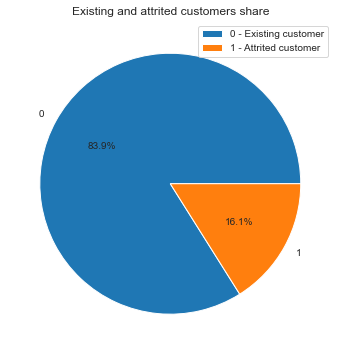

In [11]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(6,6))
plt.pie(data['Attrition_Flag'].value_counts(),labels = data['Attrition_Flag'].value_counts().index,autopct='%1.1f%%')
plt.legend(["0 - Existing customer","1 - Attrited customer"], loc = "upper right")
plt.title("Existing and attrited customers share")
plt.show()

Most of customers are existing Customers. Only 16.07% of customers closed their accounts.

## Feature description

### Categorical

In [12]:
data.dtypes[data.dtypes == 'object']

Gender             object
Education_Level    object
Marital_Status     object
Income_Category    object
Card_Category      object
dtype: object

In [13]:
data.describe(include=['O'])

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,8608,9378,9015,10127
unique,2,6,3,5,4
top,F,Graduate,Married,Less than $40K,Blue
freq,5358,3128,4687,3561,9436


In our dataset we have 5 categorical features:

#### Income category

In [14]:
(((data
.groupby("Income_Category")
.agg({'Attrition_Flag':["count","sum"]})
)['Attrition_Flag']
.reset_index()
)
.assign(attrition_rate = lambda x: round(x['sum']/x['count'],4)*100)
.assign(percent_of_all = lambda x: round(x['count']/data.shape[0],4)*100)
.rename(columns={"sum":"attrition_count"}))

,Income_Category,count,attrition_count,attrition_rate,percent_of_all
0,$120K +,727,126,17.33,7.18
1,$40K - $60K,1790,271,15.14,17.68
2,$60K - $80K,1402,189,13.48,13.84
3,$80K - $120K,1535,242,15.77,15.16
4,Less than $40K,3561,612,17.19,35.16


We will transform Income_Category to numerical discrete variable. The higher the numerical value, the wealthier the customer.

In [15]:
data["Income_Category"] = data["Income_Category"].map({'Less than $40K':0,"$40K - $60K":1,"$60K - $80K":2,"$80K - $120K":3,"$120K +":4}).astype("int64", errors="ignore")

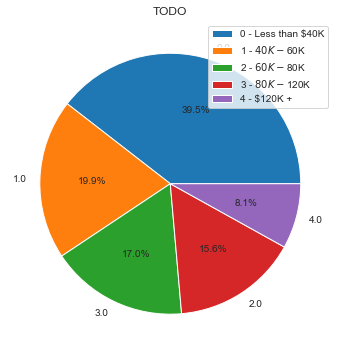

In [16]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(6,6))
plt.pie(data['Income_Category'].value_counts(),labels = data['Income_Category'].value_counts().index,autopct='%1.1f%%')
plt.legend(["0 - Less than $40K","1 - $40K - $60K", "2 - $60K - $80K" ,"3 - $80K - $120K", "4 - $120K +"],loc="upper right")
plt.title("TODO")
plt.show()

In [17]:
sns.__version__

'0.13.1'

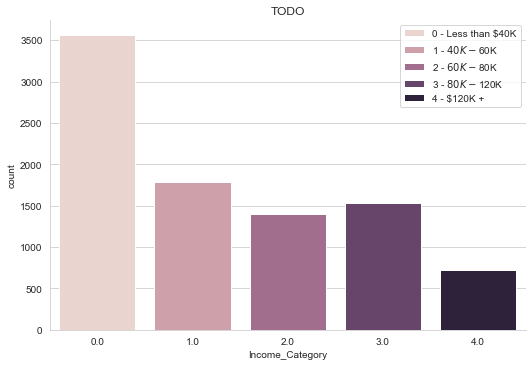

In [18]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
sns.catplot(data[data["Income_Category"].notna()], x = "Income_Category", kind = 'count', hue = "Income_Category", legend = False, height = 5, aspect = 3/2)
plt.legend(["0 - Less than $40K","1 - $40K - $60K", "2 - $60K - $80K" ,"3 - $80K - $120K", "4 - $120K +"])
plt.title("TODO")
plt.show()

TODO opis

#### Martial status

In [19]:
(((data
.groupby("Marital_Status")
.agg({'Attrition_Flag':["count","sum"]})
)['Attrition_Flag']
.reset_index()
)
.assign(attrition_rate = lambda x: round(x['sum']/x['count'],4)*100)
.assign(percent_of_all = lambda x: round(x['count']/data.shape[0],4)*100)
.rename(columns={"sum":"attrition_count"}))

,Marital_Status,count,attrition_count,attrition_rate,percent_of_all
0,Divorced,748,121,16.18,7.39
1,Married,4687,709,15.13,46.28
2,Single,3943,668,16.94,38.94


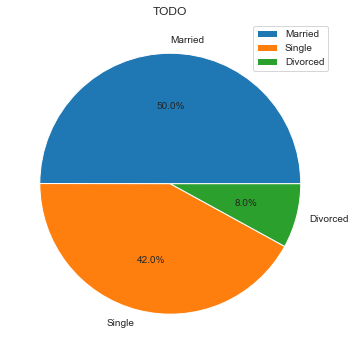

In [20]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(6,6))
plt.pie(data['Marital_Status'].value_counts(),labels = data['Marital_Status'].value_counts().index,autopct='%1.1f%%')
plt.title("TODO")
plt.legend()
plt.show()

#### Card category

In [21]:
(((data
.groupby("Card_Category")
.agg({'Attrition_Flag':["count","sum"]})
)['Attrition_Flag']
.reset_index()
)
.assign(attrition_rate = lambda x: round(x['sum']/x['count'],4)*100)
.assign(percent_of_all = lambda x: round(x['count']/data.shape[0],4)*100)
.rename(columns={"sum":"attrition_count"}))

,Card_Category,count,attrition_count,attrition_rate,percent_of_all
0,Blue,9436,1519,16.10,93.18
1,Gold,116,21,18.10,1.15
2,Platinum,20,5,25.00,0.20
3,Silver,555,82,14.77,5.48


We can see that we have 4 different card types. In dataset description we weren't provided with meanging of each card type. We can only assume that:

Blue - this is the "cheapest card", with fewest bonuses.

Silver - this is the second card if it comes to costs of maintanance.

Gold - this is next card if it comes to costs of maintanance.

Platinum - this is the most expensive card if it comes to maintenance fee, this card is supposedly for "premium" users.

Now taking this assumptions we will transform those categorical variables into numerical discrete variable. The higher the value, the more expensive is the card. 

In [22]:
data['Card_Category'] = data["Card_Category"].map({"Blue":0,"Silver":1,"Gold":2,"Platinum":3}).astype("int64")

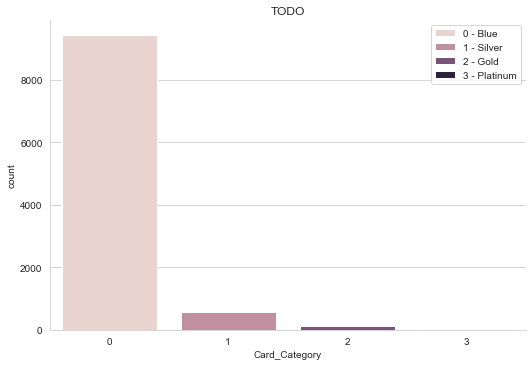

In [23]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
sns.catplot(data[data["Card_Category"].notna()], x = "Card_Category", kind = 'count', hue = "Card_Category", legend = False, height = 5, aspect = 3/2)
plt.legend(["0 - Blue", "1 - Silver", "2 - Gold", "3 - Platinum"])
plt.title("TODO")
plt.show()

#### Education level

In [24]:
(((data
.groupby("Education_Level")
.agg({'Attrition_Flag':["count","sum"]})
)['Attrition_Flag']
.reset_index()
)
.assign(attrition_rate = lambda x: round(x['sum']/x['count'],4)*100)
.assign(percent_of_all = lambda x: round(x['count']/data.shape[0],4)*100)
.rename(columns={"sum":"attrition_count"}))

,Education_Level,count,attrition_count,attrition_rate,percent_of_all
0,College,1013,154,15.20,10.00
1,Doctorate,451,95,21.06,4.45
2,Graduate,3128,487,15.57,30.89
3,High School,2013,306,15.20,19.88
4,Post-Graduate,516,92,17.83,5.10
5,Uneducated,1487,237,15.94,14.68


We can map values of variable Education_Level to numerical ordinary values. The higher the number, the higher the education of cusotmer

In [25]:
data['Education_Level'] = data["Education_Level"].map({"Uneducated":0,"High School":1,"College":2,"Graduate":3,"Post-Graduate":4,"Doctorate":5}).astype("int64", errors = "ignore")

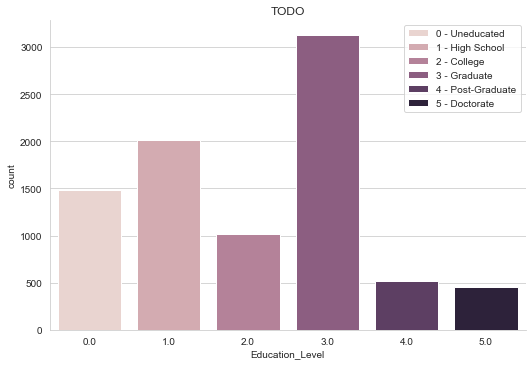

In [26]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
sns.catplot(data[data["Education_Level"].notna()], x = "Education_Level", kind = 'count', hue = "Education_Level", legend = False, height = 5, aspect = 3/2)
plt.legend(["0 - Uneducated", "1 - High School", "2 - College", "3 - Graduate", "4 - Post-Graduate", "5 - Doctorate"], loc = "upper right")
plt.title("TODO")
plt.show()

TODO opis

#### Gender

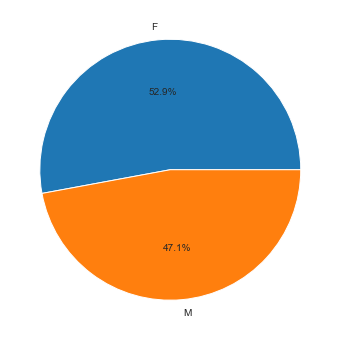

In [27]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(6,6))
plt.pie(data['Gender'].value_counts(),labels = data['Gender'].value_counts().index,autopct='%1.1f%%')
plt.show()

In our dataset there's a slight imbalance in gender distribution, with a 3% higher representation of female customers compared to male customers. 

### Numerical

On this step of our Exploratory Data Analysis
we would like to group some of the numerical variables in order to analyse them together and not individually

In [28]:
data.drop(columns=['CLIENTNUM',"Attrition_Flag","Education_Level", "Income_Category","Card_Category"]).dtypes[data.dtypes != 'object']
# we are not taking into account variables that we described earlier

Customer_Age                  int64
Dependent_count               int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [50]:
numerical=data.drop(columns=['CLIENTNUM',"Attrition_Flag","Education_Level", "Income_Category","Card_Category"]).describe()
numerical.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,1302.417847,1267.705639,1293.364353,1268.920874,1267.918974,1267.945193,10246.691294,2255.100175,9482.915620,1266.700268,5964.714445,1319.666408,1266.720789,1266.156448
std,3565.719871,3579.695807,3569.359983,3579.204850,3579.609722,3579.599123,10439.274058,3276.837707,10849.334071,3580.101880,5770.786816,3558.916914,3580.093622,3580.321478
min,8.016814,0.000000,7.986416,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,37.250000,1.224181,26.500000,2.638602,1.752656,1.776556,4050.500000,700.990501,2936.625000,0.528052,3086.721940,39.618143,0.496022,0.137750
50%,46.162980,2.173102,35.964205,3.906290,2.170584,2.227659,8860.365174,1219.407031,8279.912480,0.747970,4151.543152,65.929347,0.707111,0.275293
75%,57.250000,3.500000,44.000000,5.250000,3.750000,3.750000,10362.125000,1967.250000,9926.000000,1.493500,6087.500000,95.500000,1.542000,0.627000
max,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,34516.000000,10127.000000,34516.000000,10127.000000,18484.000000,10127.000000,10127.000000,10127.000000


In [ ]:
corr = data.corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.25)
sns.heatmap(
    corr, linewidths=1.5, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}
)
plt.show()

<Figure size 576x576 with 0 Axes>

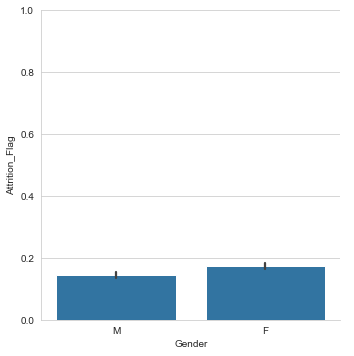

In [30]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(8,8))
g = sns.catplot(data,x = "Gender",kind="bar",y = 'Attrition_Flag')
g.set(ylim=(0, 1))
plt.show()

<Figure size 576x576 with 0 Axes>

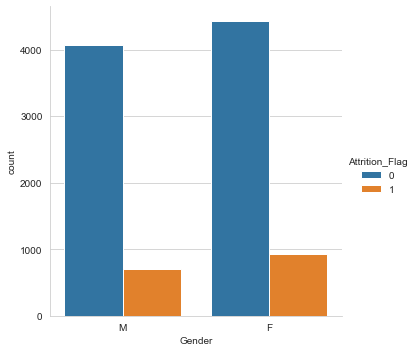

In [31]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(8,8))
sns.catplot(data,x = "Gender",kind="count",hue = 'Attrition_Flag')
plt.show()

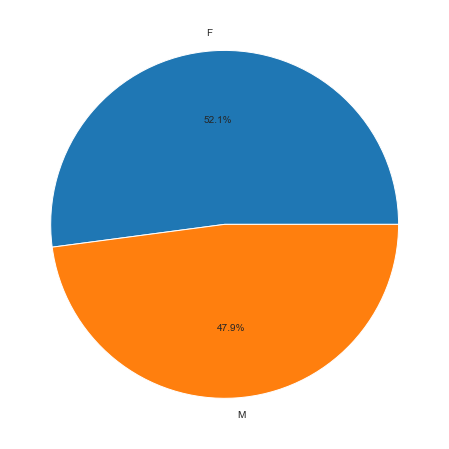

In [32]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(8,8))
plt.pie(data[data['Attrition_Flag']==0]['Gender'].value_counts(),labels = data[data['Attrition_Flag']==0]['Gender'].value_counts().index,autopct='%1.1f%%')
plt.show()

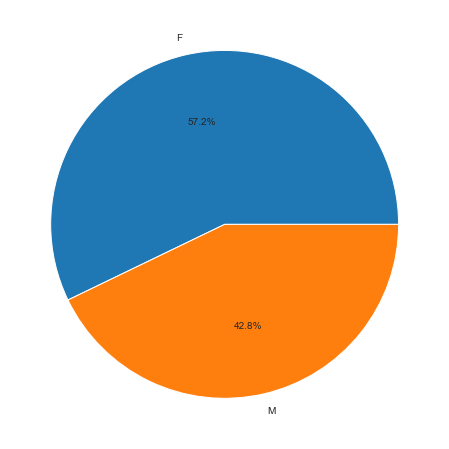

In [33]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(8,8))
plt.pie(data[data['Attrition_Flag']==1]['Gender'].value_counts(),labels = data[data['Attrition_Flag']==1]['Gender'].value_counts().index,autopct='%1.1f%%')
plt.show()

Proportion of different card categories among all of customers


In [34]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(8,8))
# plt.pie(data[data['Attrition_Flag']==1]['Card_Category'].value_counts(),labels = data[data['Attrition_Flag']==1]['Card_Category'].value_counts().index,autopct='%1.1f%%')
plt.show()

<Figure size 576x576 with 0 Axes>

93.4% of Attrited customers had Blue Card, which is the cost common and basic one of all cards 

In [35]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(8,8))
# plt.pie(data[data['Gender']=='F']['Card_Category'].value_counts(),labels = data[data['Gender']=='F']['Card_Category'].value_counts().index,autopct='%1.1f%%')
plt.show()

<Figure size 576x576 with 0 Axes>

In [36]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(8,8))
# plt.pie(data[data['Gender']=='M']['Card_Category'].value_counts(),labels = data[data['Gender']=='M']['Card_Category'].value_counts().index,autopct='%1.1f%%')
plt.show()

<Figure size 576x576 with 0 Axes>

95.2% of Woman have a Blue card, whereas 90.9% of Man have it

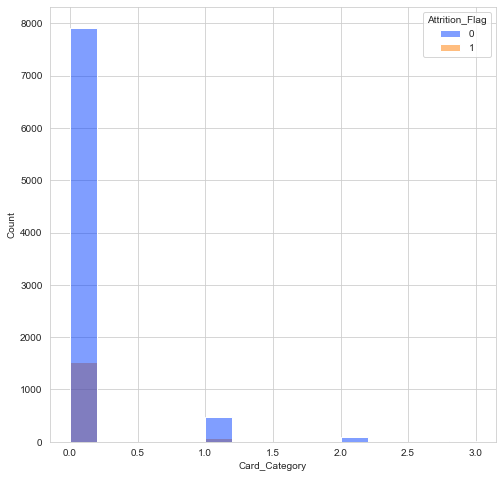

In [37]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(8,8))
sns.histplot(data=data,x="Card_Category",hue="Attrition_Flag",palette="bright")
plt.show()

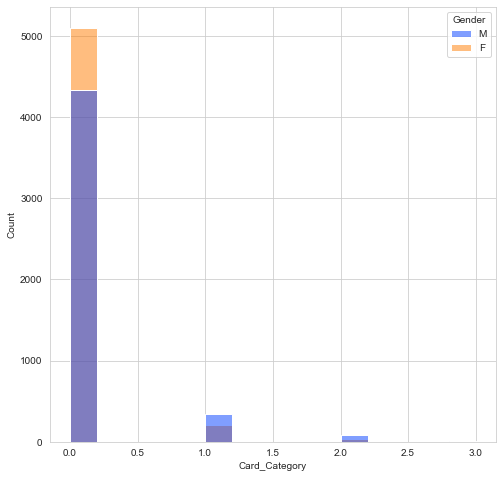

In [38]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(8,8))
sns.histplot(data=data,x="Card_Category",hue="Gender",palette="bright")
plt.show()

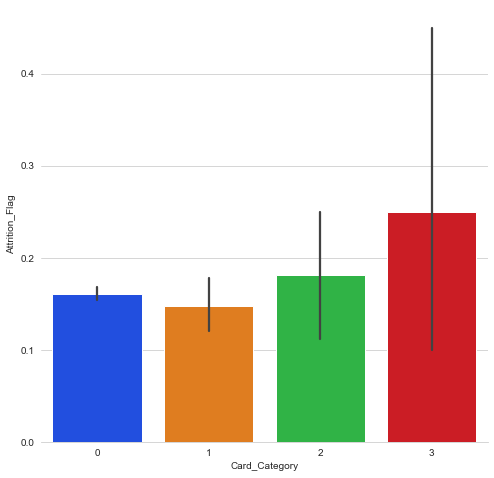

In [39]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(8,8))
sns.barplot(data,x = "Card_Category",y = 'Attrition_Flag',palette="bright",hue = "Card_Category",legend = False)
sns.despine(left=True)
plt.show()

## Combined analysis of variables

In [40]:
# aaa

## Other

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

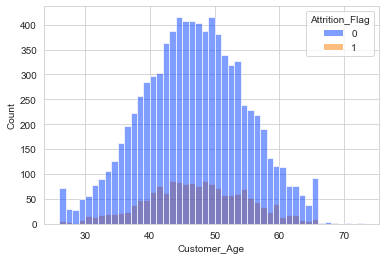

In [41]:
# plt.figure(figsize=(15,6))
sns.set_style("whitegrid",{'font_scale':'1.6'})
sns.histplot(data=data,x="Customer_Age",hue="Attrition_Flag",palette="bright")
#lepiej korzystac z SNS, ta biblioteka jest nowsza niz plt i wyglada "lepiej"
#wiecej o kolorach w SNS: https://seaborn.pydata.org/tutorial/color_palettes.html

<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

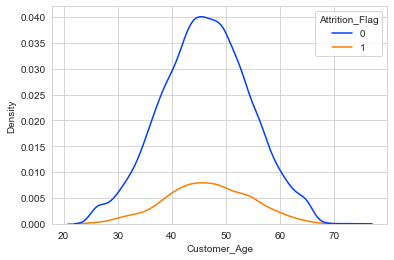

In [42]:
# plt.figure(figsize=(15,6))
sns.set_style("whitegrid",{'font_scale':'1.6'})
sns.kdeplot(data=data,x="Customer_Age",hue="Attrition_Flag",palette="bright")

<AxesSubplot:xlabel='Months_on_book', ylabel='Density'>

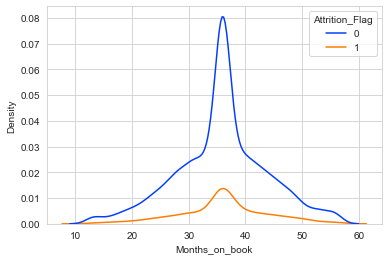

In [43]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
sns.kdeplot(data=data,x="Months_on_book",hue="Attrition_Flag",palette="bright")

array([[<AxesSubplot:title={'center':'CLIENTNUM'}>,
        <AxesSubplot:title={'center':'Attrition_Flag'}>,
        <AxesSubplot:title={'center':'Customer_Age'}>,
        <AxesSubplot:title={'center':'Dependent_count'}>],
       [<AxesSubplot:title={'center':'Education_Level'}>,
        <AxesSubplot:title={'center':'Income_Category'}>,
        <AxesSubplot:title={'center':'Card_Category'}>,
        <AxesSubplot:title={'center':'Months_on_book'}>],
       [<AxesSubplot:title={'center':'Total_Relationship_Count'}>,
        <AxesSubplot:title={'center':'Months_Inactive_12_mon'}>,
        <AxesSubplot:title={'center':'Contacts_Count_12_mon'}>,
        <AxesSubplot:title={'center':'Credit_Limit'}>],
       [<AxesSubplot:title={'center':'Total_Revolving_Bal'}>,
        <AxesSubplot:title={'center':'Avg_Open_To_Buy'}>,
        <AxesSubplot:title={'center':'Total_Amt_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Total_Trans_Amt'}>],
       [<AxesSubplot:title={'center':'Total_Trans_Ct'

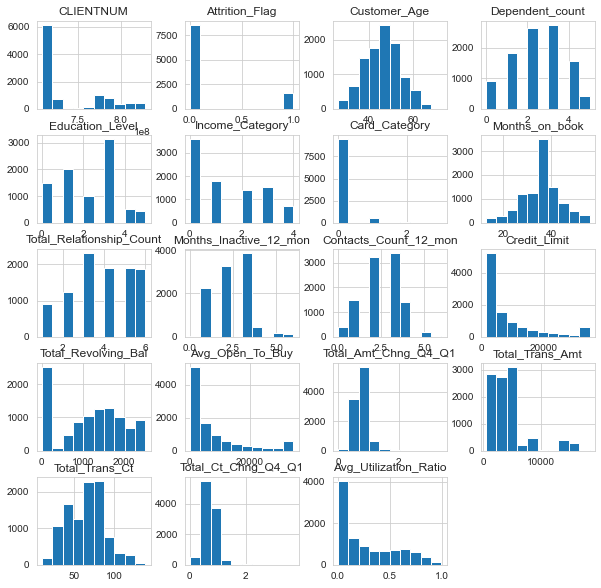

In [44]:
data.hist(figsize=(10,10))

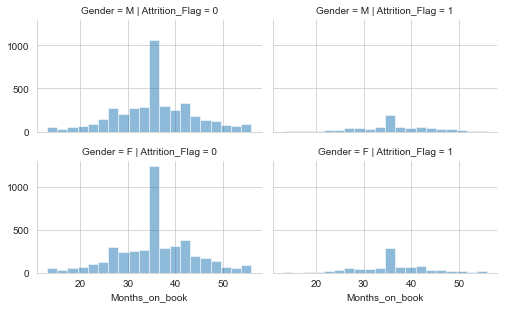

In [45]:
grid = sns.FacetGrid(data, col='Attrition_Flag', row='Gender', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Months_on_book', alpha=.5, bins=20)
grid.add_legend()

## Correlation

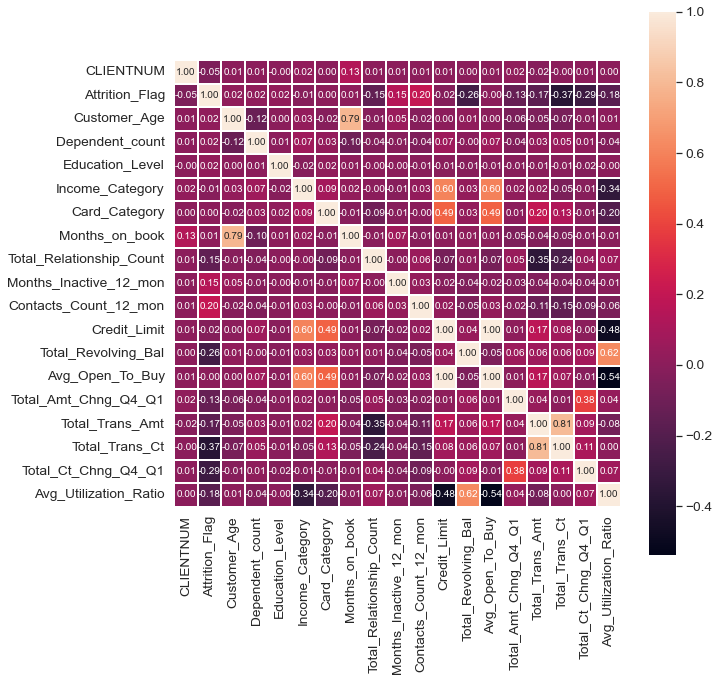

In [46]:
corr = data.corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.25)
sns.heatmap(
    corr, linewidths=1.5, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}
)
plt.show()

## PCA - clustering of customers

to do 

# Dataset splitting